In [ ]:
import pandas as pd
import numpy as np
! git clone

# temp = temp.str.replace(',','')
# temp.unique()
# temp = pd.to_numeric(temp,errors = 'coerce')

# temp.describe()
# df['price'] = temp

vars = ['Beds','Property Type']
df['Beds'].describe()
gdf = df.loc[df['Beds_nan'] == 0,:]



y =gdf['Price']
x = gdf.loc[:,['Beds','Property Type']]
# property type is currently a string and pyhton does not like this


Q1.1

This paper is about how effectively and easily convert messy datasets into a specific, clean kind of dataset: Tidy datasets.

Q1.2

The tidy standard is intended to easily organize data that simplifies data analysis, exploration and analysis. The tiny standard is organized in a way that makes it compatible with many basic data analysis tools built into coding languages.

Q1.3

The first sentence means that tidy datasets are all alike because they are arranged in a standardized way that allows for maximal understanding, but data sets are all messy in their own way because they arranged in a way that is only understandbale to select few people and can often lack standardization on how to record variables. The second sentence means that while after some time it can become apparent whether columns or rows represent the observations or variables, on the other hand it requires a code book to deciper what exactly the variable is measuring and what the figurative observational numbers represent.

Q1.4

He defines values as all of the observational data that come together to make a dataset, whether it is qualitative or quantitative. A variable is a category of values that measure the same underlying attribute across units. Lastly, he defines observations as the values observed on the same unit across differen attributes.

Q1.5

In section 2.3, tidy data is defined as a standard way of mapping the meaning of a dataset to its structure. More specifically, each column forms a variable, each row forms an observation, and each observation unit forms a table.

Q1.6

The five most common problems in messy datasets are the column headers are stored as values, rather than the variables name, numerious variables are stored in one column, variables are not restricted to only columns or rows, multiple types of observational units are stored in the same data set, and a single observational unit is stored in multiple tables. The data in the table is messy because it is designed for presentation rather than use. This results in the column headers being values rather than variable names and variables form the columns and the rows. Melting a dataset is when you turn the columns into rows.

Q1.7

Table 11 is messy because it has variables spread across columns and rows and does not have variable names for the headers. Table 12 is tidy and molten due to the columns being switched to the rows.

Q1.8

The chicken and the egg problem with data cleaning is that as we continually improve our data analysis tools independently from the tidy standard dataset structure will not improve workflow. This is due to our data sets not improving comparably to our data analysis tools. He hopes that in the future that individuals will build off of the tidy standard data set and continually improve it.




Question 2

2.1)

In [ ]:
import pandas as pd
import numpy as np
! git clone https://www.github.com/aniyahlater/assignment2
df=pd.read_csv('./assignment2/data/airbnb_hw.csv')
print(df.head(10))

Cloning into 'assignment2'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 36 (delta 8), reused 5 (delta 5), pack-reused 24
Receiving objects: 100% (36/36), 5.47 MiB | 15.55 MiB/s, done.
Resolving deltas: 100% (9/9), done.
    Host Id Host Since                                 Name Neighbourhood   \
0   5162530        NaN      1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN      Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                 Sunny Room in Harlem      Manhattan   
3       500  6/26/2008   Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008             Trendy Times Square Loft      Manhattan   
5      1039  7/25/2008   Big Greenpoint 1BD w/ Skyline View       Brooklyn   
6      1783  8/12/2008                         Amazing Also      Manhattan   
7      2078  8/15/2008  Colorful, quiet, & near the 

In [ ]:
price = df.loc[:,'Price']
print("Number of missing values in 'Price':", np.sum(df['Price'].isnull()))
print(price.describe())
#actually beginning to clean the variable
df['Price'] = df['Price'].str.replace(',','')
pd.to_numeric(df['Price'])
print("Number of missing values in 'Price':", np.sum(df['Price'].isnull()))



Number of missing values in 'Price': 0
count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object
Number of missing values in 'Price': 0


2.2)

In [ ]:
sharks = pd.read_csv('./assignment2/data/sharks.csv')
print(sharks['Type'].unique())
print(sharks['Type'].describe())
# we can reduce 'boating' 'watercraft' 'boat' and 'boatomg' to a single category -> "involves water vehicle"
category_changes= {'Boating' :'Watercraft', 'Boat' : 'Watercraft','Boatomg': 'Watercraft'}
sharks['Type'] = sharks['Type'].replace(category_changes)
#going to combine unconfirmed, unverified, and under investigation; going to rename to AdditionalInfoRequired
category_additional = {'Unconfirmed':'AdditionalInfoRequired', 'Unverified': 'AdditionalInfoRequired', 'Under investigation': 'AdditionalInfoRequired'}
sharks['Type'] = sharks['Type'].replace(category_additional)
print(sharks['Type'].unique())


['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg']
count           6457
unique            12
top       Unprovoked
freq            4716
Name: Type, dtype: object
['Unprovoked' 'Provoked' 'Questionable' 'Watercraft'
 'AdditionalInfoRequired' 'Invalid' 'Sea Disaster' nan]


<ipython-input-37-975fc13b217c>:1: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  sharks = pd.read_csv('./assignment2/data/sharks.csv')


2.3)

In [ ]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)


In [ ]:
#print(df['WhetherDefendantWasReleasedPretrial'].describe())

#print(df['WhetherDefendantWasReleasedPretrial'].unique())
#first going to change the name because that is alot to type
df = df.rename(columns = {'WhetherDefendantWasReleasedPretrial':'releasedPT'})
print(df['releasedPT'].value_counts())
sum_of_na = df['releasedPT'].isna().sum()
#going to replace all the 9 observations with NAN because they would effect what the outcomes would
#be because it makes it look like more people are released more than what it is in reality
nine = 9
df['releasedPT']= df['releasedPT'].replace(nine,np.nan)
print(df['releasedPT'].value_counts())
print(sum_of_na)


1.0    19154
0.0     3801
Name: releasedPT, dtype: int64
1.0    19154
0.0     3801
Name: releasedPT, dtype: int64
31


2.4)

In [ ]:
#print(df['ImposedSentenceAllChargeInContactEvent'].unique())
#going to replace empty observations with 0 because i believe that '' means that they served no time in prison and more than likely received another kind of sentence type
#first going to rename the variable
df = df.rename(columns = {'ImposedSentenceAllChargeInContactEvent':'timeServedinMonths'})
#print(df['timeServedinMonths'].isna().sum())
absent = ' '
#accidentally converted all the ' ' to np.nan so i went back and converted the nan to 0
df['timeServedinMonths'] = df['timeServedinMonths'].replace(np.nan,0)
print(df['timeServedinMonths'].unique)

<bound method Series.unique of 0                       0
1                      60
2                      12
3        .985626283367556
4                       0
               ...       
22981                   0
22982                   0
22983                   0
22984                   0
22985                   0
Name: timeServedinMonths, Length: 22986, dtype: object>


3.2)

In [ ]:
import pandas as pd
import numpy as np
! git clone https://www.github.com/aniyahlater/assignment2
college=pd.read_csv('./assignment2/data/college_completion.csv')
#print(college.head(10))
#print(college.count)




Cloning into 'assignment2'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 36 (delta 8), reused 5 (delta 5), pack-reused 24
Receiving objects: 100% (36/36), 5.47 MiB | 22.39 MiB/s, done.
Resolving deltas: 100% (9/9), done.


 There are 3798 observations and 63 variables. Specifically, the observations are colleges and universities in the United States and the variables pertain to various information about the colleges such as what state they're located in, whether they're a 2 year or 4 year college, nicknames, if they are an HBCU or not and more information




3.3)

In [ ]:
print(pd.crosstab(college.control,college.level))

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


 The most prominent type of 2 year instituition is a public, on the other hand the most prominent tyoe of 4 year instituition is private not-for-profit. Interestingly, the second most prominent 2 year institution is private for profit, even though 2 year colleges are supposed to be more affordable so I feel this is in direct contrast from their original purpose.



3.4)

100.0
0.0
Axes(0.125,0.11;0.775x0.77)


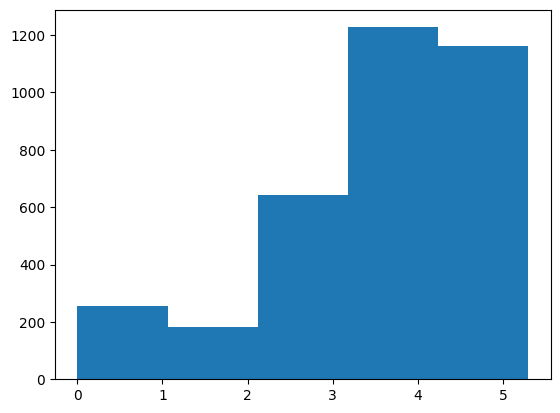

In [ ]:
print(college.grad_100_value.max())
print(college.grad_100_value.min())
#the minimum is 0 and the maximum is 100 so we will do 5 boxes !!
college['grad_100_value_arcsinh'] = np.arcsinh(college['grad_100_value'])
print(college.grad_100_value_arcsinh.hist(bins = 5 ,grid=False))

Axes(0.125,0.11;0.775x0.77)


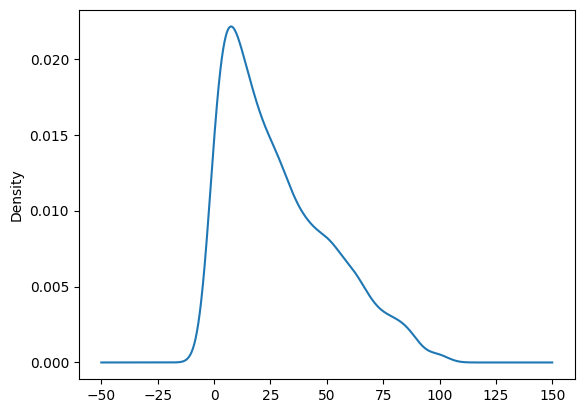

In [ ]:
print(college.grad_100_value.plot.density())

<Axes: >

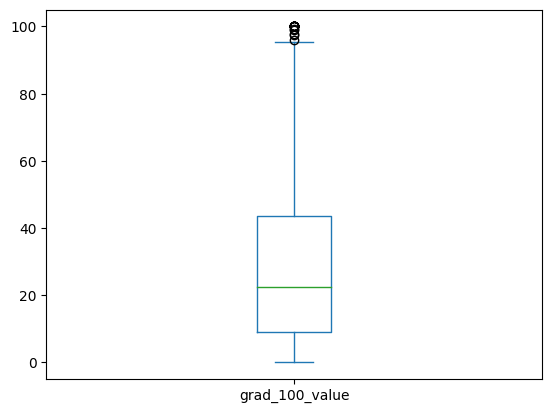

In [ ]:
college.grad_100_value.plot.box()

In [ ]:
college.grad_100_value.describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

3.5)

Axes(0.125,0.11;0.775x0.77)


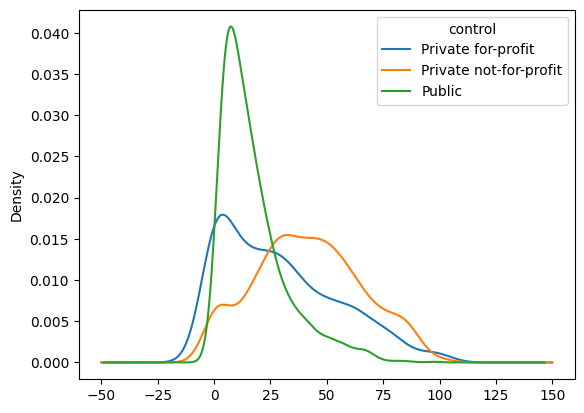

In [ ]:
group_by = 'control'
var = 'grad_100_value'
college_wide = college.pivot(columns=group_by,values=var)
print(college_wide.plot.density())

In [ ]:

print(college_wide.describe())

control  Private for-profit  Private not-for-profit       Public
count            779.000000             1189.000000  1499.000000
mean              29.108858               41.660976    17.430887
std               25.601687               23.551231    14.729443
min                0.000000                0.000000     0.000000
25%                6.950000               25.000000     6.900000
50%               24.700000               41.000000    13.200000
75%               46.750000               58.300000    23.250000
max              100.000000              100.000000    97.800000


INTERPRETATION FOR CONTROL


After examining the kernel density plot and statistical description of the grad_100_value variable and the control variable, it is apparent that public universitys have a high peak around 12.5 on the x-axis. This informs us that around 12.5 percent of the student population at a public unviersity are first time bachelor students who are on track to graduate on time. Interestigly, private not for profit colleges have multiple peaks with the largest absolute peak a little over 25. This suggests that slightly over 1/4th of the student population at private not for profit univeristy are first time seeking bachelor students who are expected to graduate within 4 years.

Axes(0.125,0.11;0.775x0.77)


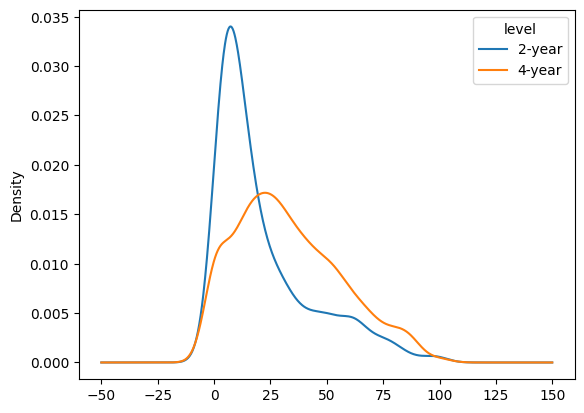

In [ ]:
grouped_by2 = 'level'
college_width2 = college.pivot(columns = grouped_by2,values = var)
print(college_width2.plot.density())

In [ ]:
print(college_width2.describe())

level       2-year       4-year
count  1455.000000  2012.000000
mean     21.636151    33.230119
std      21.645747    23.270160
min       0.000000     0.000000
25%       6.000000    15.200000
50%      13.000000    29.700000
75%      30.600000    49.225000
max     100.000000   100.000000


INTERPRET FOR LEVEL

When interpreting the kernel density plot, we see there is a higher peak for 2 year instuitions aroun 12.5 and 4-year instuitions have their peak a little over 25. Additionally, the 2 year instuition has a very strong peak on the other hand the 4-year instuition is more rounded and does not have a steep decline comparable to the 2 year instuitions. Interestingly, this informs us that there is a higher population of individuals at 2-year instituitions who are first-time seeking degrees/certification undegraduates and are expected to complete their program on time. This could be a result of most community colleges acting as a transitory school to help individuals acclimate into a 4-year college.

Lastly, the colleges that appear to have the best graduation rates are private not for profit, 4 year institutions.

3.6)

Axes(0.125,0.11;0.775x0.77)


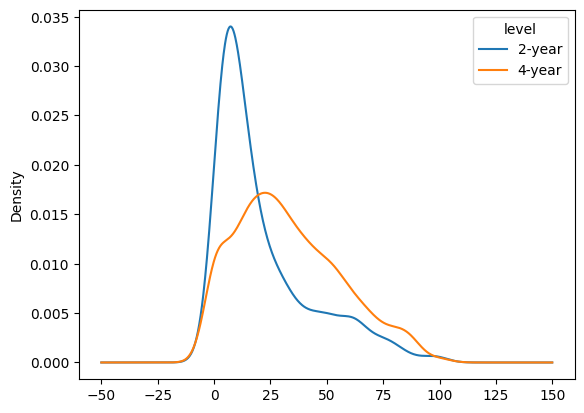

In [ ]:
college['levelXcontrol']=college['level']+', '+college['control']
levelXcontrol_width = college.pivot(columns = 'levelXcontrol', values = var)
print(college_width2.plot.density())

It appears that 4 year institutions have the highest graduations rates.

3.7)

Axes(0.125,0.11;0.775x0.77)


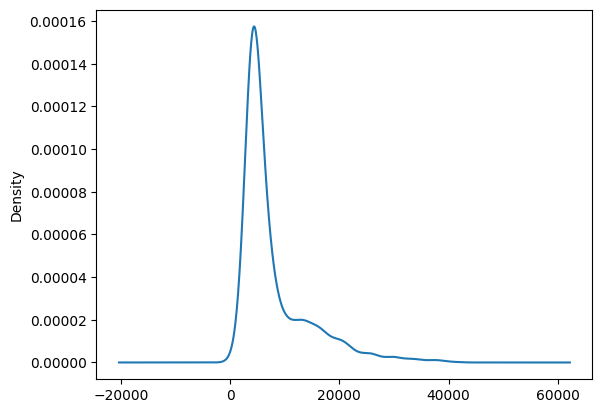

In [ ]:
print(college.aid_value.plot.density())

['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer', 'vsa_enroll_after4_transfer', 'vs

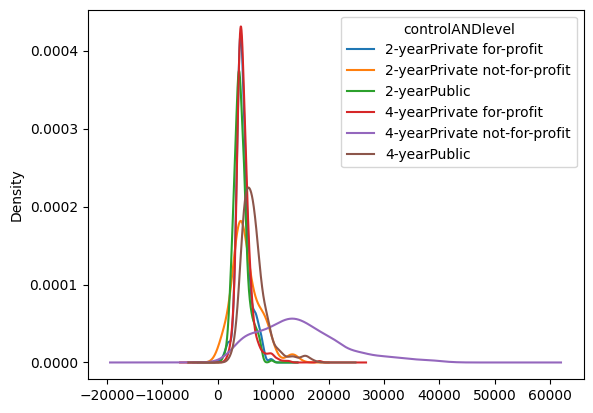

In [ ]:
college['controlANDlevel'] = college['level'] + college['control']
print(list(college.columns))
aidgrouped_width = college.pivot(columns='controlANDlevel',values = 'aid_value')
print(aidgrouped_width.plot.density())
print(aidgrouped_width.describe())


text for intepreting 3.7

Looking at the grouped-by kernel density plot we see that that there are some prominent, yet less dense peaks towards the right that could be causing the right peak leading to a bi-modal kernel density plot. Some of the observations that could be causing this bump are 4 year private not-for-profit colleges, 2 year private not-for-profit and 4 year public institutions.

3.8)

Axes(0.125,0.11;0.775x0.77)


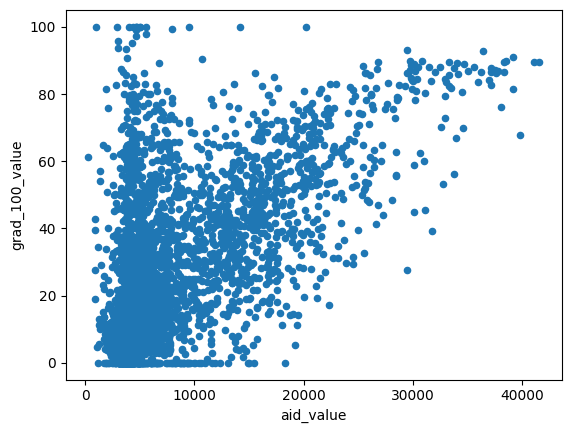

In [ ]:
scatterplot1 = college.plot.scatter(y='grad_100_value',x='aid_value')
print(scatterplot1)


A general trend present in the scatter plot is that as the average amount of financial awarded to an institution increases, the graduaton rate increases as well. However, there is numerous data points with very low financial aid awards but an almost perfect graduation rate leading to some data stacking in the bottom corner.

Axes(0.125,0.11;0.775x0.77)


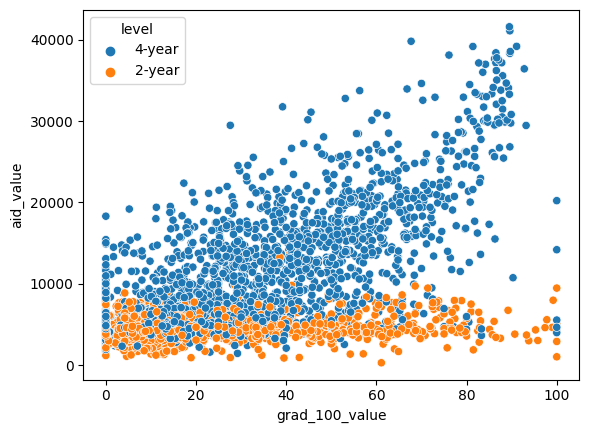

In [ ]:
import seaborn as sns
sns.scatterplot(x='grad_100_value',y='aid_value',hue='level',data=college)
# the link to this code https://stackoverflow.com/questions/56394204/pandas-groupby-scatter-plot-in-a-single-plot


level
2-year    Axes(0.125,0.11;0.775x0.77)
4-year    Axes(0.125,0.11;0.775x0.77)
dtype: object


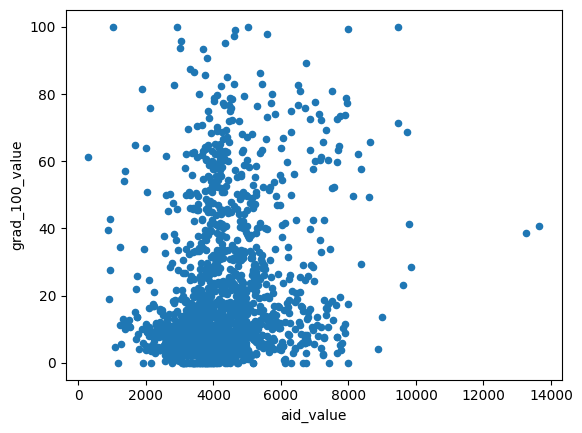

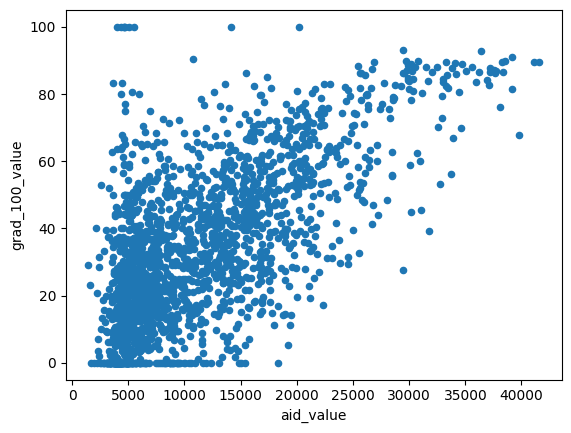

In [ ]:
print(college.groupby('level').plot.scatter(y='grad_100_value',x='aid_value'))

It is apparent that the more financial aid a 4 year institution awards to their undergraduates results in higher graduation rates.